<a href="https://colab.research.google.com/github/rameshboggu36/credit_card_fraud_detection/blob/master/credit_card_fraud_detection_with_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [ ]:
credit_card_data.head(1)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  

[1 rows x 31 columns]

In [ ]:
credit_card_data.tail(1)

Time        V1        V2        V3        V4        V5        V6  \
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7       V8       V9  ...       V21       V22       V23  \
284806  1.577006 -0.41465  0.48618  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649   217.0      0  

[1 rows x 31 columns]

In [ ]:
credit_card_data.shape

(284807, 31)

```
```
#__Understanding the Data__
```
```

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_data.isna().sum().sort_values(ascending=False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [ ]:
credit_card_data.duplicated().sum()

1081

In [ ]:
credit_card_data=credit_card_data.drop_duplicates()

In [ ]:
credit_card_data.duplicated().sum()

0

In [ ]:
credit_card_data.shape

(283726, 31)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
credit_card_data[['Time','Amount','Class']].describe()

Time     Amount      Class
count 283726.000 283726.000 283726.000
mean   94811.078     88.473      0.002
std    47481.048    250.399      0.041
min        0.000      0.000      0.000
25%    54204.750      5.600      0.000
50%    84692.500     22.000      0.000
75%   139298.000     77.510      0.000
max   172792.000  25691.160      1.000

```
```
#__Exploratory Data Analysis__
```
```

In [ ]:
credit_card_data.shape[0]

283726

In [ ]:
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
#separating the data into legit and fraud
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(f'Number of legit transactions are : {len(legit)} and are of {round(len(legit)/len(credit_card_data) * 100,3)} % of the dataset')
print(f'Number of fraud transactions are : {len(fraud)} and are of {round(len(fraud)/len(credit_card_data) * 100,3)} % of the dataset')

Number of legit transactions are : 283253 and are of 99.833 % of the dataset
Number of fraud transactions are : 473 and are of 0.167 % of the dataset


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

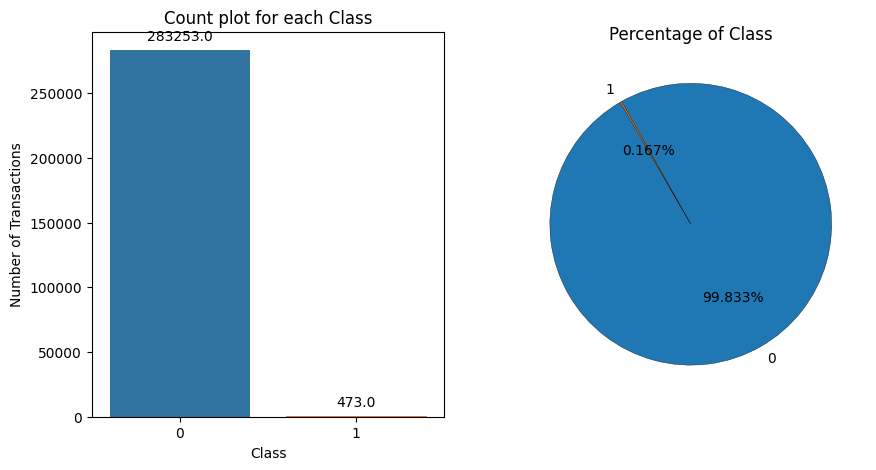

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=credit_card_data,x='Class',ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Count plot for each Class')
class_counts = credit_card_data['Class'].value_counts()
axes[1].pie(class_counts,labels=class_counts.index, startangle = 120,autopct='%1.3f%%',wedgeprops = {'edgecolor' : 'black','linewidth': 0.25,'antialiased' : True})
axes[1].set_title('Percentage of Class')
plt.show()

In [ ]:
time_in_days = (credit_card_data['Time'].iloc[-1])/(60*60*24)
print(f'Number of days the transactions were taken: {round(time_in_days)} days')

Number of days the transactions were taken: 2 days


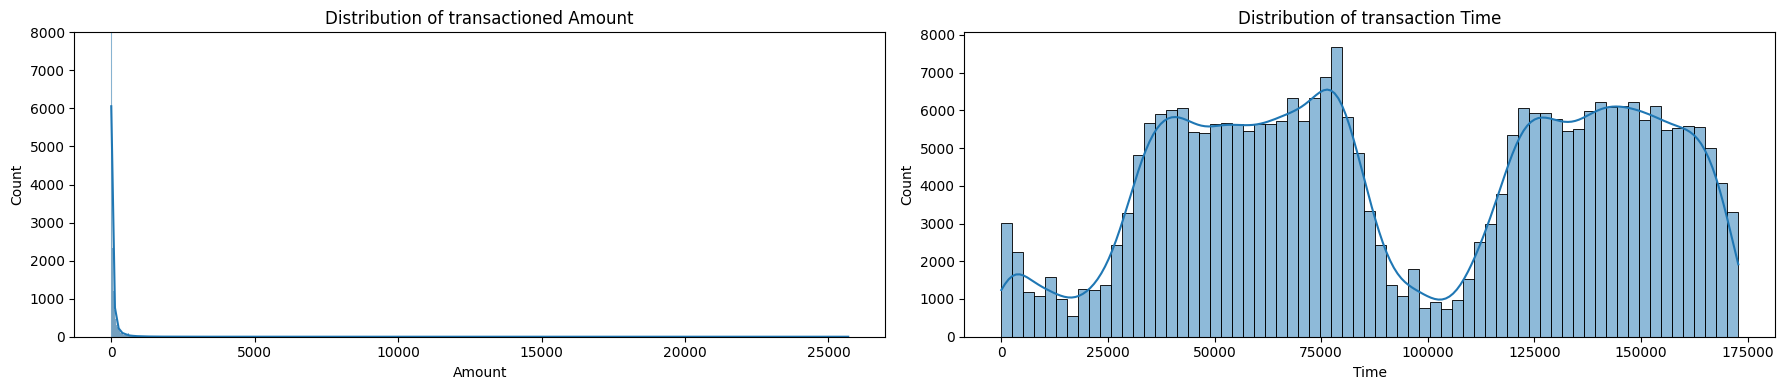

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(18,4))
sns.histplot(credit_card_data['Amount'],ax=axes[0],kde=True)
axes[0].set_ylim(0, 8000)
axes[0].set_title('Distribution of transactioned Amount')
sns.histplot(credit_card_data['Time'],ax=axes[1],kde=True)
axes[1].set_title('Distribution of transaction Time')
plt.tight_layout()
plt.show()

Here the scale of amount and time are quite varied from other features, so we use scaling to make these features into one standard scale.

To decide which scaling to use, we first check for outliers, if we found and outliers then accordingly we will choose.

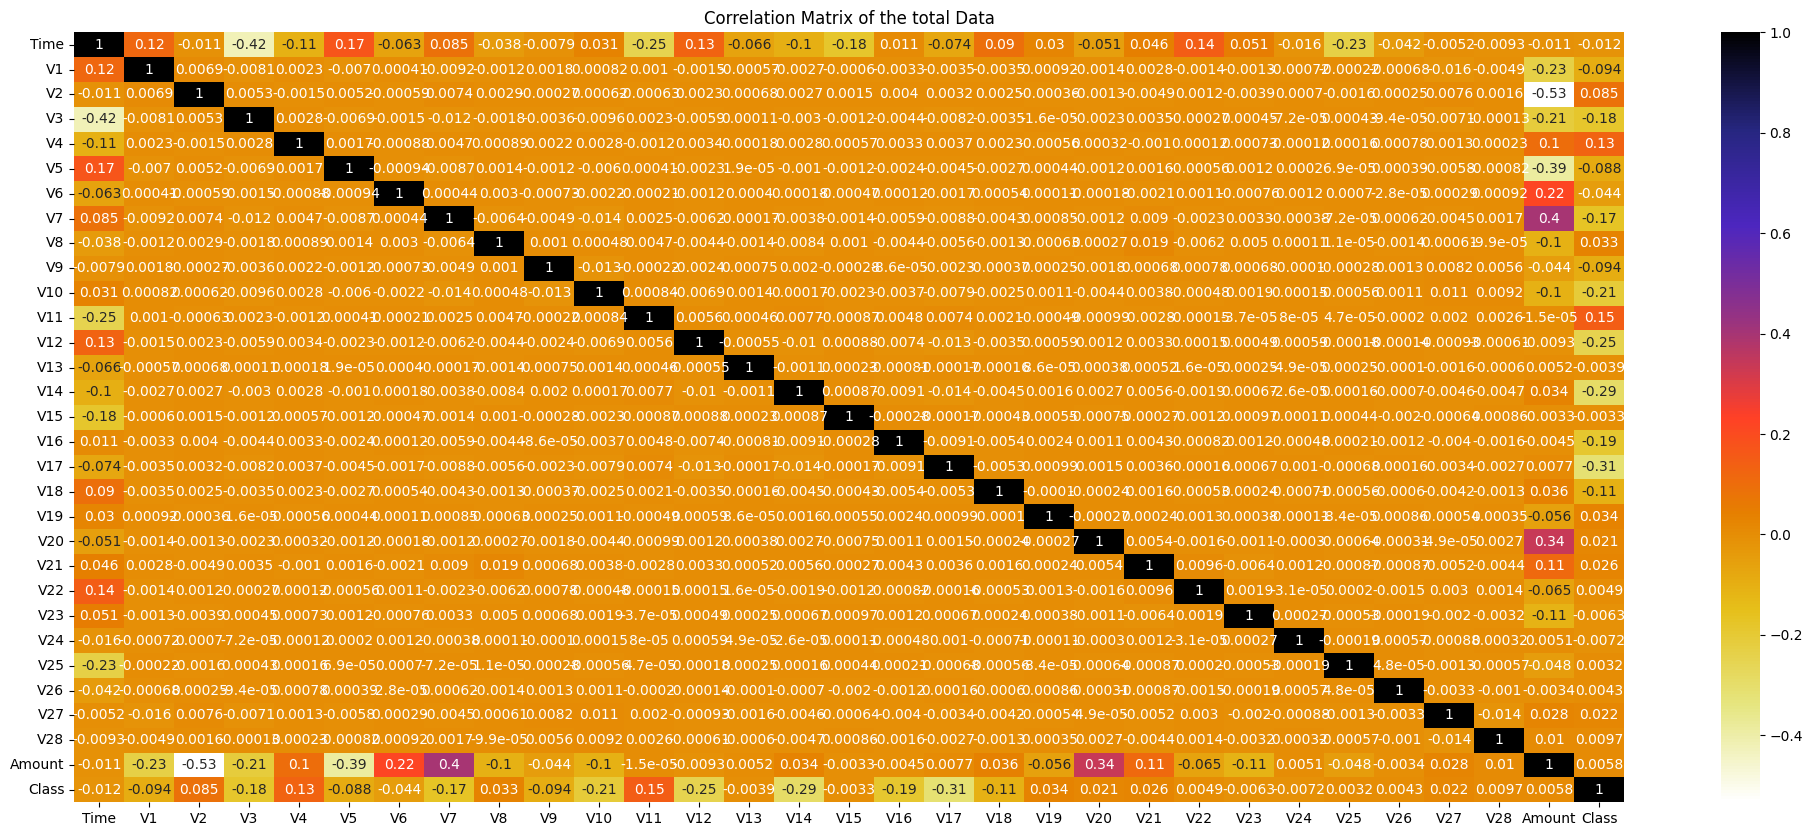

In [ ]:
plt.figure(figsize=(25,10))
corr = credit_card_data.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.title("Correlation Matrix of the total Data")
plt.show()

In [ ]:
Q1 = credit_card_data['Amount'].quantile(0.25)
Q3 = credit_card_data['Amount'].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = (credit_card_data['Amount'] < 0.5*(Q1 - 1.5 * IQR)) | (credit_card_data['Amount'] > 2*(Q3 + 1.5 * IQR))

print(outliers_iqr.sum())

13973


here instead of using normal range for outliers, used the modified range inorder to avoid loosing information.


In [ ]:
credit_card_data_no_outliers = credit_card_data[~outliers_iqr]

print(f"Number of outliers removed: {outliers_iqr.sum()}")

credit_card_data_no_outliers.reset_index(drop=True, inplace=True)

Number of outliers removed: 13973


In [ ]:
credit_card_data_no_outliers.shape

(269753, 31)

In [ ]:
credit_card_data_no_outliers['Class'].value_counts()

0    269322
1       431
Name: Class, dtype: int64

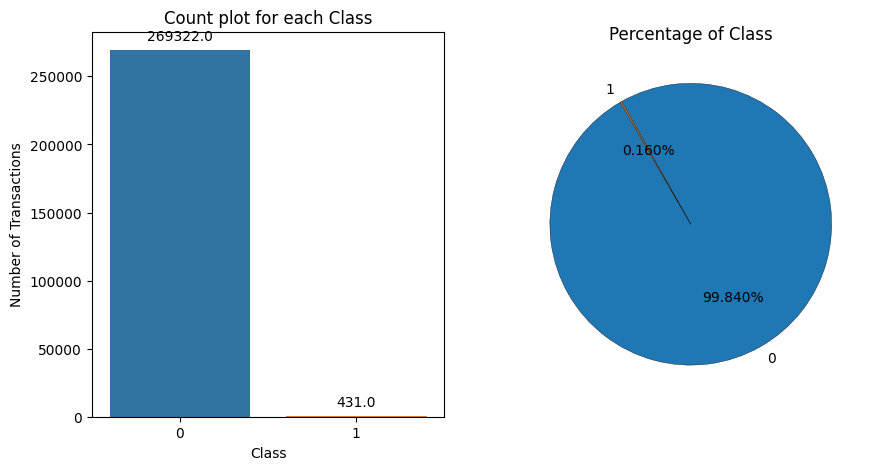

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=credit_card_data_no_outliers,x='Class',ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Count plot for each Class')
class_counts = credit_card_data_no_outliers['Class'].value_counts()
axes[1].pie(class_counts,labels=class_counts.index, startangle = 120,autopct='%1.3f%%',wedgeprops = {'edgecolor' : 'black','linewidth': 0.25,'antialiased' : True})
axes[1].set_title('Percentage of Class')
plt.show()

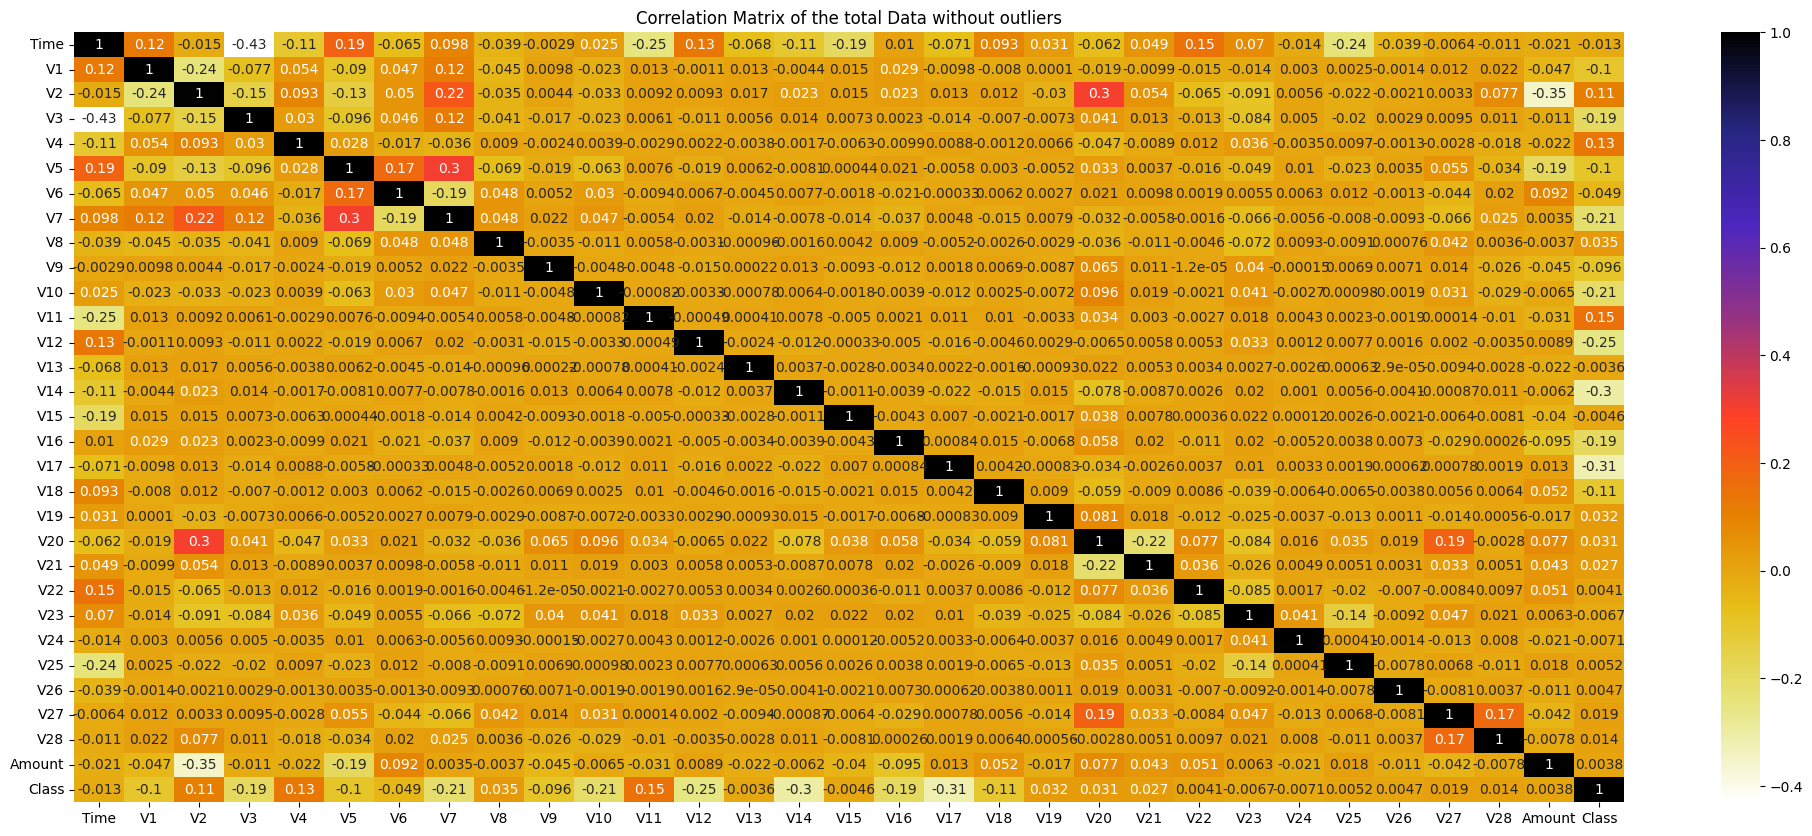

In [ ]:
plt.figure(figsize=(25,10))
corr_no_outliers = credit_card_data_no_outliers.corr()
sns.heatmap(corr_no_outliers,annot=True,cmap=plt.cm.CMRmap_r)
plt.title("Correlation Matrix of the total Data without outliers")
plt.show()

We can see, due to the removal of outliers, the PCA features lost their orthoganility between them as we can see dependency between them.

Here the dataset is highly imbalanced, using an imbalanced data to train the model will lead to biased results towards the majority class.

Inorder to overcome this problem, we have two techniques.

  1. Undersampling of the dataset
  2. Oversampling of dataset. (Random Sampling and __SMOTE__)

```
```
#__Undersampling__

In [ ]:
fraud_no_outliers = credit_card_data_no_outliers[credit_card_data_no_outliers['Class']==1]

In [ ]:
legit_no_outliers = credit_card_data_no_outliers[credit_card_data_no_outliers['Class']==0].sample(len(fraud))

In [ ]:
legit_no_outliers = legit_no_outliers.sample(len(fraud_no_outliers))

In [ ]:
fraud_total = credit_card_data[credit_card_data['Class']==1]

In [ ]:
legit_total = credit_card_data[credit_card_data['Class']==0]

In [ ]:
legit_total = legit_total.sample(len(fraud_total))

In [ ]:
under_total = pd.concat([legit_total,fraud_total],axis=0)

In [ ]:
under_no_outliers = pd.concat([legit_no_outliers,fraud_no_outliers],axis=0)

In [ ]:
print('Shape of undersampled dataframe with outliers is {}, \nShape of undersampled dataframe without outliers is {}'.format(under_total.shape,under_no_outliers.shape))

Shape of undersampled dataframe with outliers is (946, 31), 
Shape of undersampled dataframe without outliers is (862, 31)


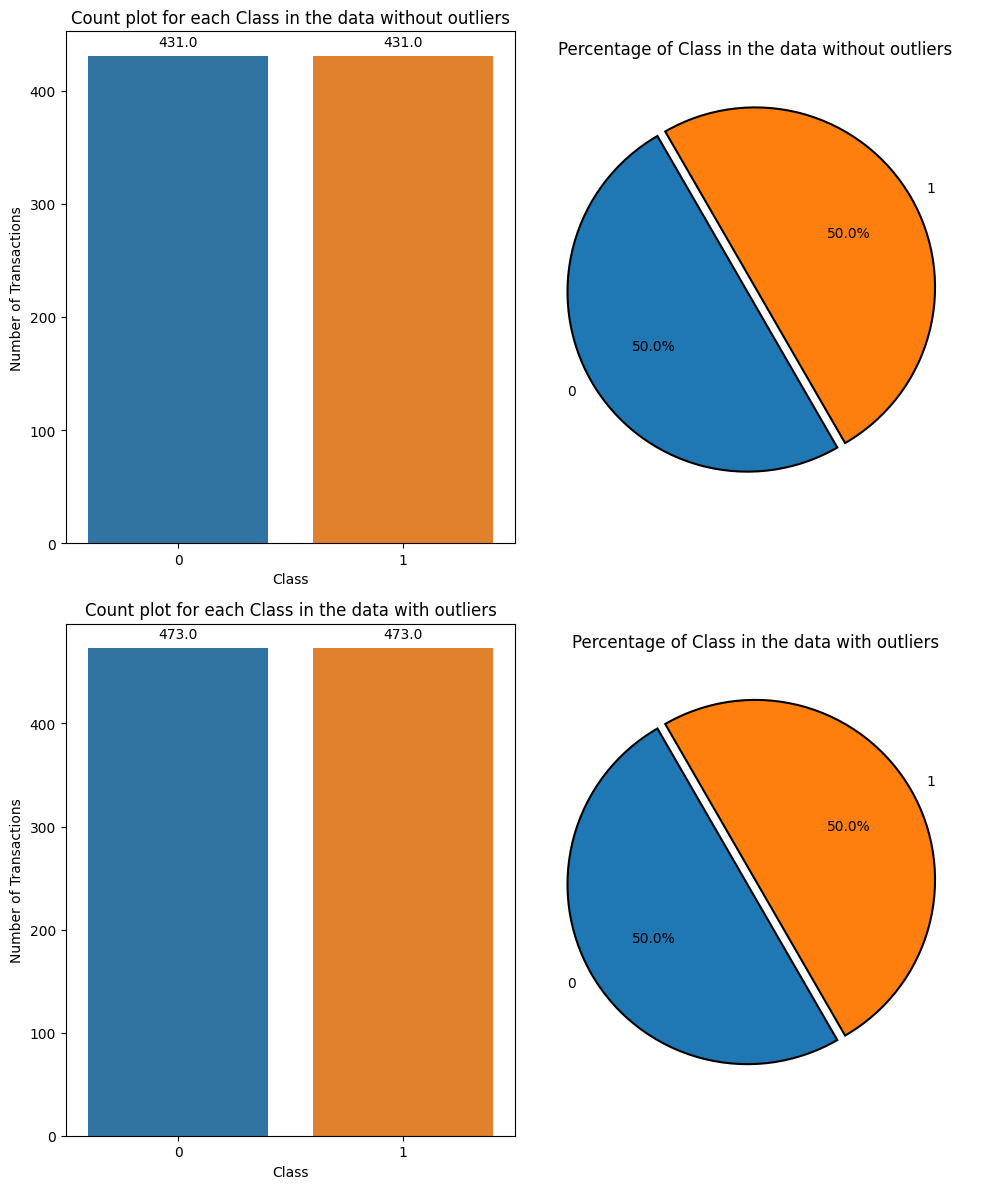

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,12))
sns.countplot(data=under_no_outliers,x='Class',ax=axes[0,0])
for p in axes[0,0].patches:
    axes[0,0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0,0].set_ylabel('Number of Transactions')
axes[0,0].set_title('Count plot for each Class in the data without outliers')
under_class_counts = under_no_outliers['Class'].value_counts()
axes[0,1].pie(under_class_counts,labels=under_class_counts.index, startangle = 120,autopct='%1.1f%%',explode = (0.05,0),wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})
axes[0,1].set_title('Percentage of Class in the data without outliers')

sns.countplot(data=under_total,x='Class',ax=axes[1,0])
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[1,0].set_ylabel('Number of Transactions')
axes[1,0].set_title('Count plot for each Class in the data with outliers')
under_class_counts = under_total['Class'].value_counts()
axes[1,1].pie(under_class_counts,labels=under_class_counts.index, startangle = 120,autopct='%1.1f%%',explode = (0.05,0),wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})
axes[1,1].set_title('Percentage of Class in the data with outliers')
plt.tight_layout()
plt.show()

```
#Splitting into training and testing data:

In [ ]:
X_total = under_total.drop('Class',axis=1)
Y_total = under_total['Class']

In [ ]:
X_no_outliers = under_no_outliers.drop('Class',axis=1)
Y_no_outliers = under_no_outliers['Class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_total_train, X_total_test, Y_total_train, Y_total_test = train_test_split(X_total, Y_total,
                                                                            test_size=0.2, stratify=Y_total, random_state=2)

In [ ]:
Y_total_train.value_counts()

1    378
0    378
Name: Class, dtype: int64

In [ ]:
Y_total_test.value_counts()

0    95
1    95
Name: Class, dtype: int64

In [ ]:
X_no_outliers_train, X_no_outliers_test, Y_no_outliers_train, Y_no_outliers_test = train_test_split(X_no_outliers, Y_no_outliers,
                                                                            test_size=0.2, stratify=Y_no_outliers, random_state=2)

In [ ]:
Y_no_outliers_train.value_counts()

1    345
0    344
Name: Class, dtype: int64

In [ ]:
Y_no_outliers_test.value_counts()

0    87
1    86
Name: Class, dtype: int64

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    plt.figure(figsize=(25,10))
    sns.heatmap(corr_matrix,annot=True,cmap=plt.cm.CMRmap_r)
    plt.title("Correlation Matrix of the Given data")
    plt.show()
    return col_corr

###removing the highly correlated features which are not adding value to the model.

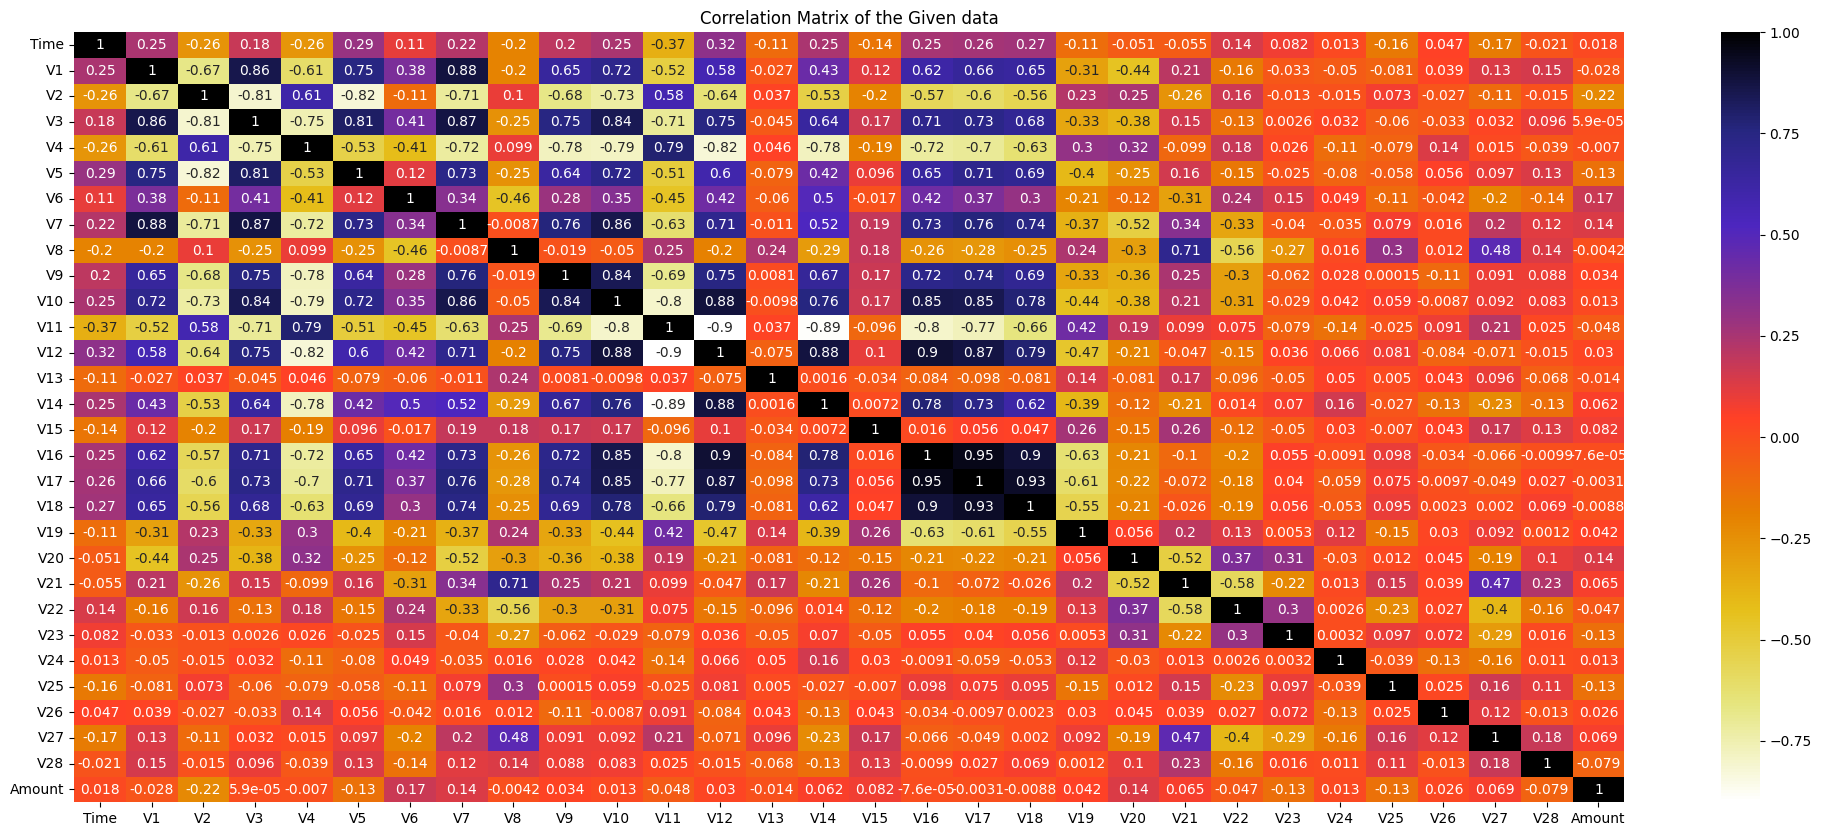

{'V14', 'V18', 'V17', 'V11', 'V7', 'V10', 'V16', 'V5', 'V12', 'V3'}
Number of features removed are:10


In [ ]:
corr_features = correlation(X_total_train, 0.8)
X_total_train = X_total_train.drop(corr_features,axis=1)
X_total_test = X_total_test.drop(corr_features,axis=1)
print(corr_features)
print('Number of features removed are:{}'.format(len(set(corr_features))))

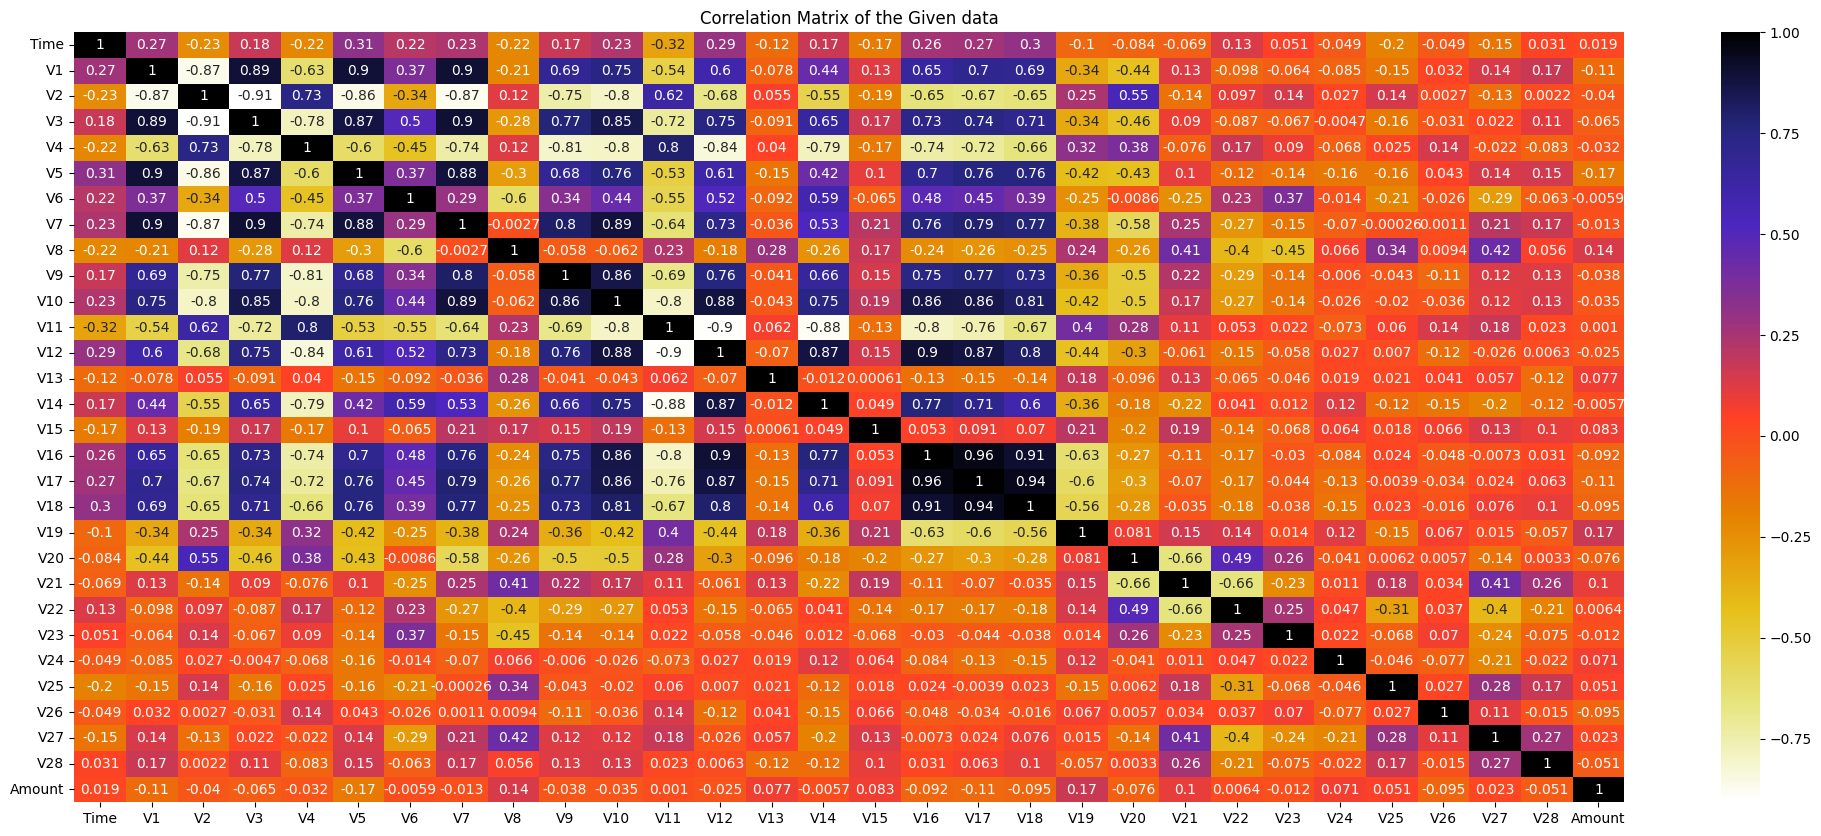

{'V14', 'V18', 'V17', 'V9', 'V7', 'V10', 'V16', 'V5', 'V2', 'V12', 'V3'}
Number of features removed are:11


In [ ]:
corr_features_no = correlation(X_no_outliers_train, 0.8)
X_no_outliers_train = X_no_outliers_train.drop(corr_features_no,axis=1)
X_no_outliers_test = X_no_outliers_test.drop(corr_features_no,axis=1)
print(corr_features_no)
print('Number of features removed are:{}'.format(len(set(corr_features_no))))

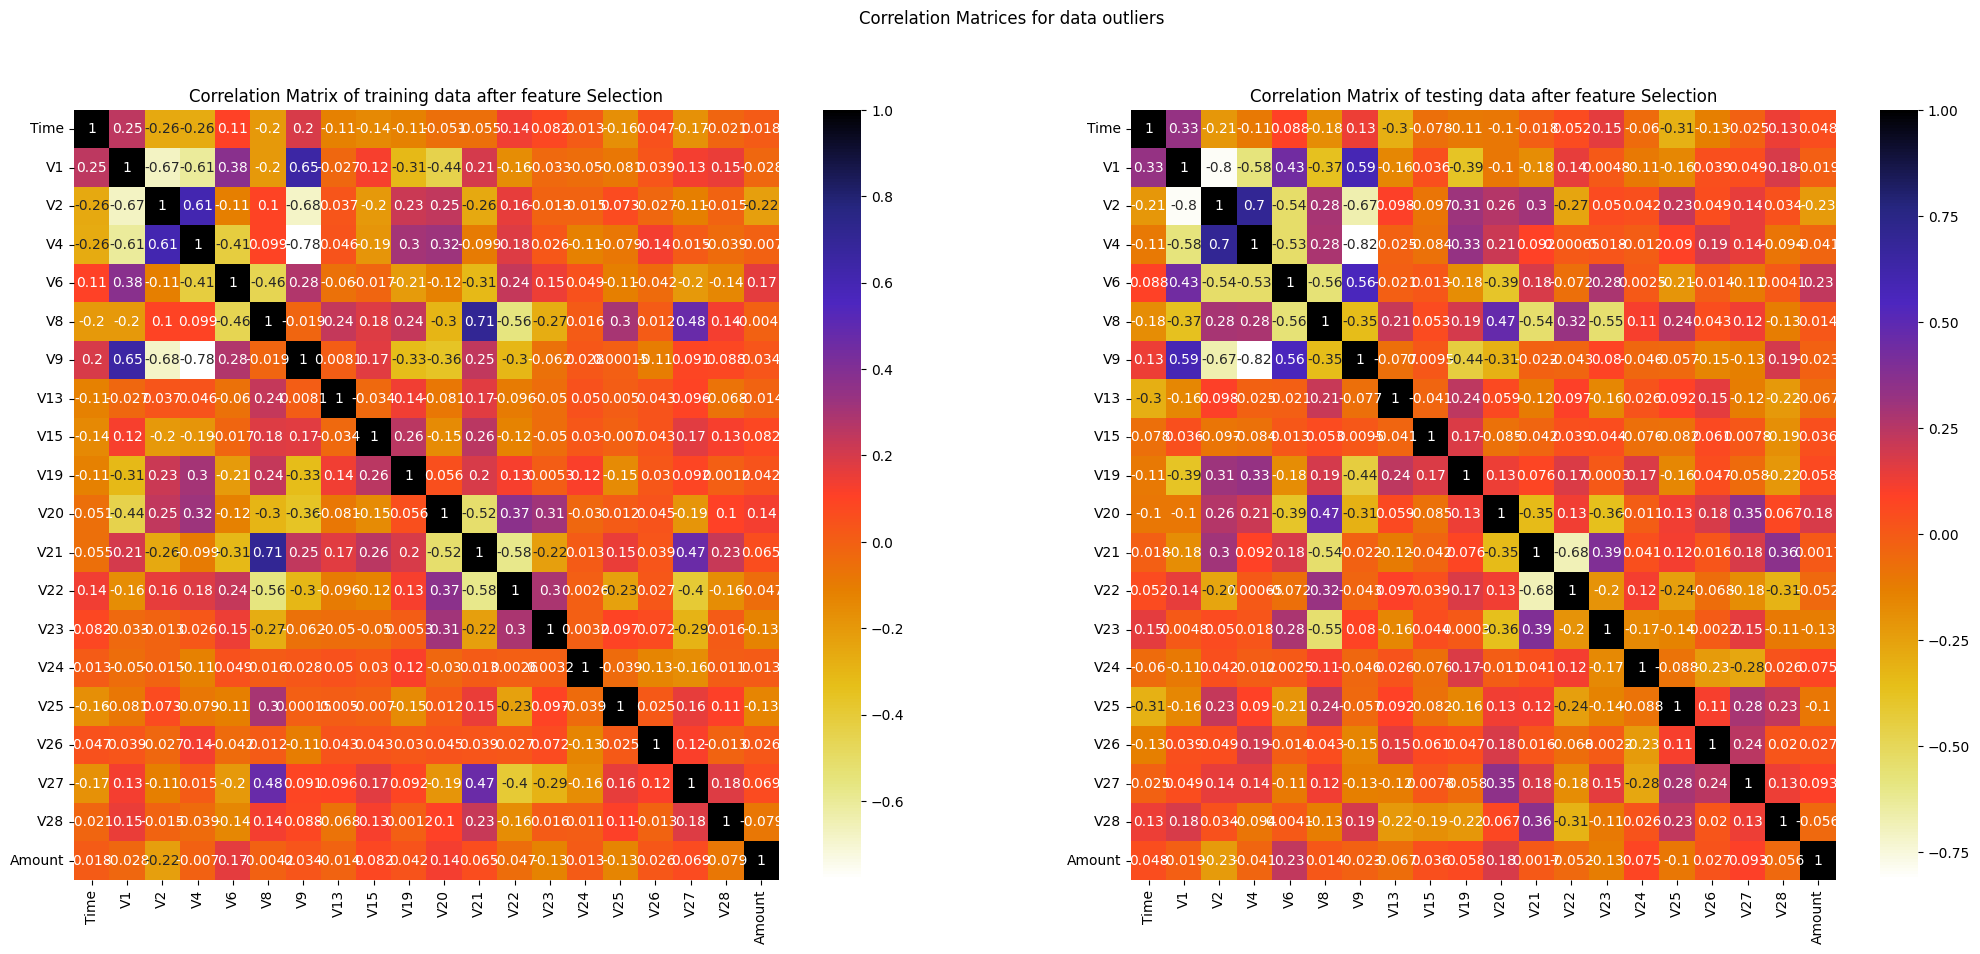

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(25,10))
corr_train = X_total_train.corr()
sns.heatmap(corr_train,annot=True,cmap=plt.cm.CMRmap_r,ax=axes[0])
corr_test = X_total_test.corr()
sns.heatmap(corr_test,annot=True,cmap=plt.cm.CMRmap_r,ax=axes[1])
axes[0].set_title("Correlation Matrix of training data after feature Selection")
axes[1].set_title("Correlation Matrix of testing data after feature Selection")
plt.suptitle("Correlation Matrices for data outliers")
plt.show()

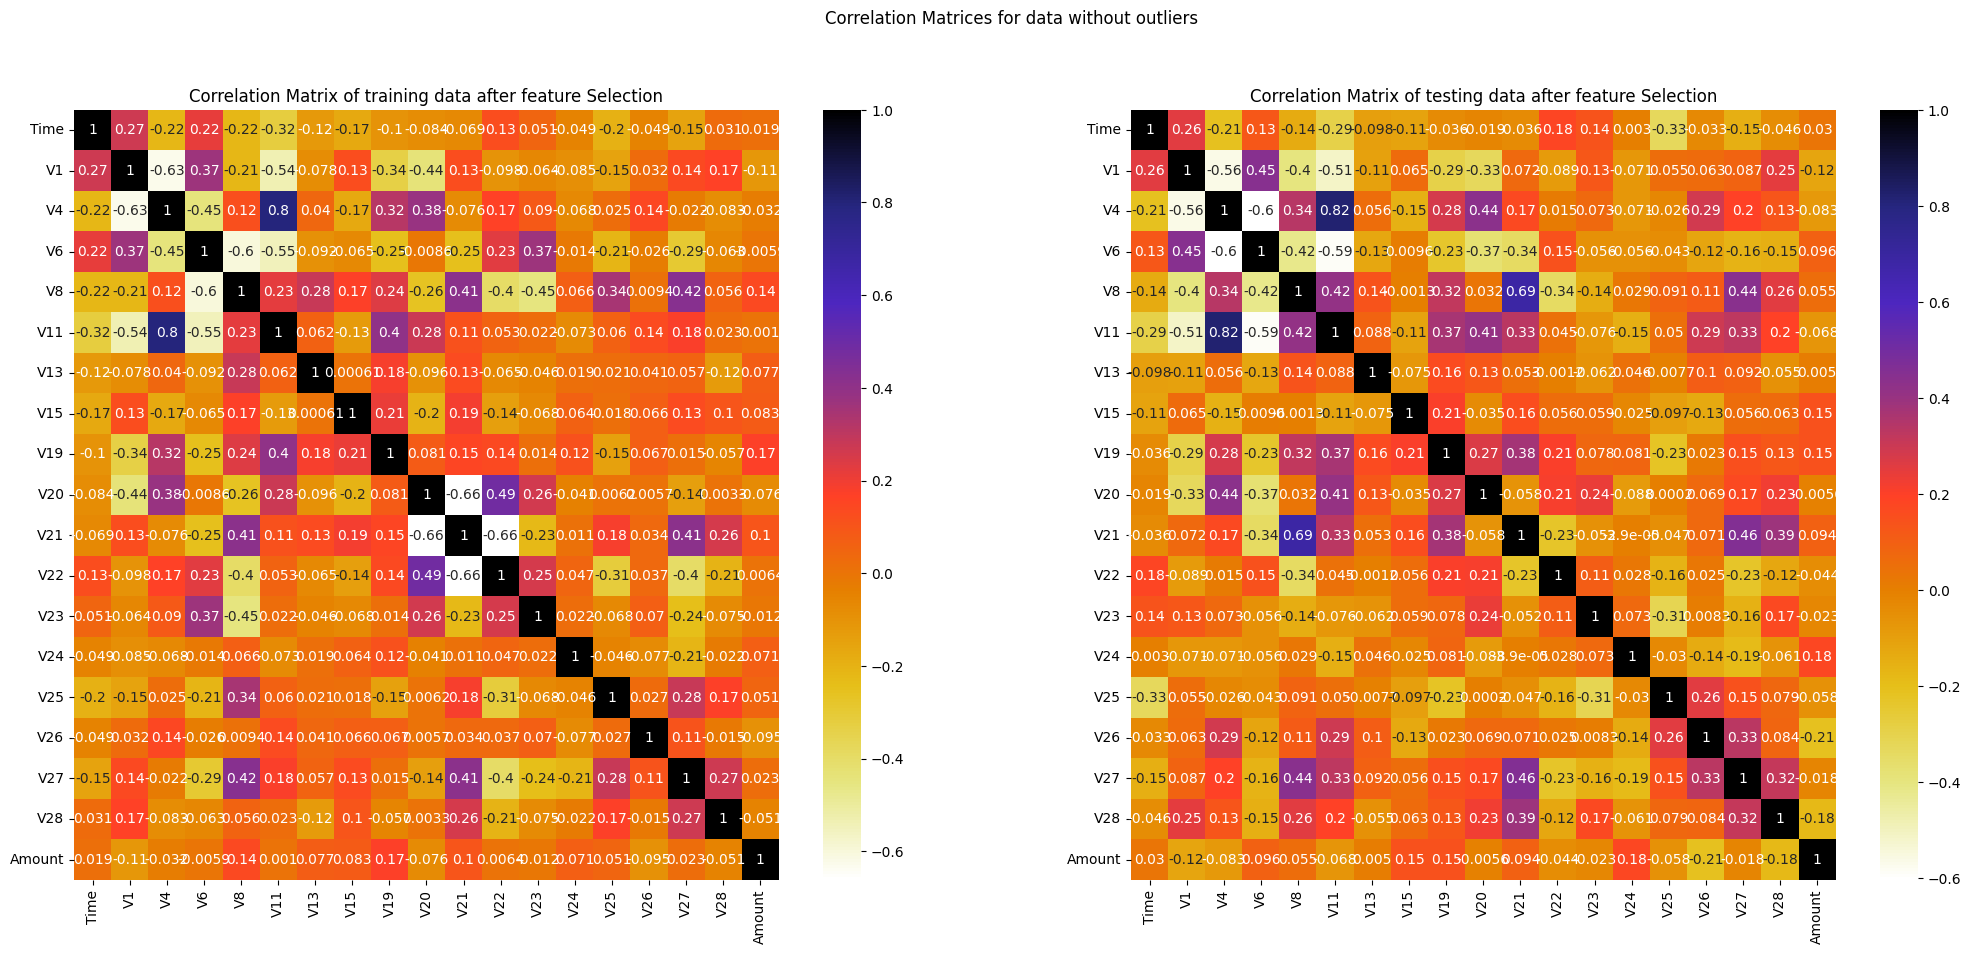

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(25,10))
corr_train = X_no_outliers_train.corr()
sns.heatmap(corr_train,annot=True,cmap=plt.cm.CMRmap_r,ax=axes[0])
corr_test = X_no_outliers_test.corr()
sns.heatmap(corr_test,annot=True,cmap=plt.cm.CMRmap_r,ax=axes[1])
axes[0].set_title("Correlation Matrix of training data after feature Selection")
axes[1].set_title("Correlation Matrix of testing data after feature Selection")
plt.suptitle("Correlation Matrices for data without outliers")
plt.show()

###as we have taken care of outliers, we will use Standard scaler to bring the data to modified data with mean = 0 and standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

In [ ]:
X_total_train_scaled = pd.DataFrame(std_scaler.fit_transform(X_total_train),columns = X_total_train.columns)
X_total_test_scaled = pd.DataFrame(std_scaler.transform(X_total_test),columns = X_total_test.columns)

In [ ]:
X_total_train_scaled.head(1)

Time     V1     V2     V4    V6     V8    V9   V13   V15   V19    V20  \
0 -0.577 -0.105 -0.241 -0.231 0.295 -0.189 0.489 0.649 1.507 0.964 -0.324   

    V21   V22   V23    V24    V25   V26    V27   V28  Amount  
0 0.064 0.550 0.167 -0.822 -0.277 2.432 -1.388 2.007  -0.028

In [ ]:
std_scaler_n = StandardScaler()

In [ ]:
X_no_outliers_train_scaled = pd.DataFrame(std_scaler_n.fit_transform(X_no_outliers_train),columns = X_no_outliers_train.columns)
X_no_outliers_test_scaled = pd.DataFrame(std_scaler_n.transform(X_no_outliers_test),columns = X_no_outliers_test.columns)

In [ ]:
X_no_outliers_train_scaled.head(1)

Time     V1    V4     V6     V8   V11    V13   V15    V19    V20   V21  \
0 -0.951 -0.343 1.453 -2.127 -0.028 1.408 -1.050 0.285 -0.794 -0.282 0.017   

     V22    V23    V24   V25   V26   V27   V28  Amount  
0 -0.082 -0.207 -0.642 1.249 1.417 0.437 2.250  -0.640

#__Over Sampling__

Using SMOTE technique for over sampling the given data.

# __Model Training__

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve, auc
from sklearn.model_selection import cross_validate, GridSearchCV

#for neural network
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def print_metrics(logi,support,rand,neu):
  print("-" * 90)
  print("| {:<15} | {:<20} | {:<12} | {:<12} | {:<12}".format("Metric", "Logistic Regression", "SVM", "Random Forest","Neural Network"))
  print("-" * 90)
  print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} | {:<12.4f} |".format("Accuracy", logi[0], support[0], rand[0],neu[0]))
  print("-" * 90)
  print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} | {:<12.4f} |".format("Precision", logi[1], support[1], rand[1],neu[1]))
  print("-" * 90)
  print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} | {:<12.4f} |".format("Recall", logi[2], support[2], rand[2],neu[2]))
  print("-" * 90)
  print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} | {:<12.4f} |".format("F1-score", logi[3], support[3], rand[3],neu[3]))
  print("-" * 90)

In [ ]:
def plot_confusion_matrix(ax,y_true, y_pred, title):

    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {title}')
    return cm

In [ ]:
def plot_confusion(y,lor,suv,raf,nn):
  fig, axs = plt.subplots(2, 2, figsize=(14, 6))
  cm_lr = plot_confusion_matrix(axs[0,0],y, lor, "Logistic Regression")
  cm_svm = plot_confusion_matrix(axs[0,1],y, suv, "SVM")
  cm_rf = plot_confusion_matrix(axs[1,0],y, raf, "Random Forest Classifier")
  cm_nn = plot_confusion_matrix(axs[1,1],y, nn, "Neural Network")

  plt.tight_layout()
  plt.show()

In [ ]:
def calculate_metrics(y_t,y_p):

  accuracy_lr = accuracy_score(y_t, y_p)
  precision_lr = precision_score(y_t, y_p)
  recall_lr = recall_score(y_t, y_p)
  f1_lr = f1_score(y_t, y_p)

  return [accuracy_lr,precision_lr,recall_lr,f1_lr]

In [ ]:
def traning_with_nn(x_train,x_test,y_train,y_test):

  #converting the x,y into tensors:
  X_train_t = torch.FloatTensor(x_train.values)
  X_test_t = torch.FloatTensor(x_test.values)
  Y_train_t = torch.LongTensor(y_train.values)
  Y_test_t = torch.LongTensor(y_test.values)

  #class for nn model
  class ANN_Model(nn.Module):
    def __init__(self, input_features=len(X_train_t[0]),hidden1=30,hidden2=20,out_features=2):
        super(ANN_Model, self).__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

  #trainig the nn
  torch.manual_seed(20)
  model = ANN_Model()
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  epochs = 3501
  final_losses = []
  f_l= []
  for epoch in range(epochs):
      optimizer.zero_grad()
      Y_pred_t = model(X_train_t)
      loss = loss_function(Y_pred_t, Y_train_t)
      final_losses.append(loss)

      if epoch % 100 == 0:
          print(f"Epoch number: {epoch} and the loss: {loss.item()}")
          pass
      f_l.append(loss.item())
      loss.backward()
      optimizer.step()

  print("Plot of the loss for each epoch")
  plt.plot(f_l, label='Training Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss Over Epochs')
  plt.legend()
  plt.show()

  # evaluating the model
  model.eval()

  predictions = []
  with torch.no_grad():
      for data in X_test_t:
          y_pred = model(data)
          predictions.append(y_pred.argmax().item())

  model.train()

  return predictions


In [ ]:
def print_report(classifier,test,pred):

  print('For {}:'.format(classifier))
  print("="*90)
  print(classification_report(test,pred))
  print("="*90)

In [ ]:
def plot_roc(y_test,y_pred_lr,y_pred_sv,y_pred_rf,y_pred_nn):
  fpr_l, tpr_l, _ = roc_curve(y_test, y_pred_lr)
  fpr_s, tpr_s, _ = roc_curve(y_test, y_pred_sv)
  fpr_r, tpr_r, _ = roc_curve(y_test, y_pred_rf)
  fpr_n, tpr_n, _ = roc_curve(y_test, y_pred_nn)


  #AUC
  auc_l = auc(fpr_l, tpr_l)
  auc_s = auc(fpr_s, tpr_s)
  auc_r = auc(fpr_r, tpr_r)
  auc_n = auc(fpr_n, tpr_n)



  plt.figure(figsize=(8, 6))
  plt.plot(fpr_l, tpr_l, label=f'Logistic Regression (AUC = {auc_l:.2f})')
  plt.plot(fpr_s, tpr_s, label=f'SVM (AUC = {auc_s:.2f})')
  plt.plot(fpr_r, tpr_r, label=f'Random Forest (AUC = {auc_r:.2f})')
  plt.plot(fpr_n, tpr_n, label=f'Neural Network (AUC = {auc_n:.2f})')


  plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve for Different Models')
  plt.legend()
  plt.show()

In [ ]:
def tuning(estimator,paramters,scoring,x_train,y_train):
  grid_search = grid_search_svm = GridSearchCV(estimator = estimator,
                            param_grid = paramters,
                            scoring = scoring,
                            cv = 10,
                            n_jobs = -1)
  grid_search = grid_search.fit(x_train, y_train)
  return grid_search

In [ ]:
def cross_validation(models,X_total_train_scaled, X_total_test_scaled, Y_total_train, Y_total_test):
  X = pd.concat([X_total_train_scaled, X_total_test_scaled],axis = 0)
  Y = pd.concat([Y_total_train, Y_total_test],axis = 0)
  scoring = ['accuracy','precision','recall','f1']
  scores = cross_validate(models[0],X, Y,scoring=scoring,cv=10)
  scores_svm = cross_validate(models[1],X, Y,scoring=scoring,cv=10)
  scores_random = cross_validate(models[2],X, Y,scoring=scoring,cv=10)
  lr=[]
  sv=[]
  rf=[]
  for i in scoring:
      strng = 'test_' + i
      logistic_mean = scores[strng].mean()
      lr.append(logistic_mean)
      svm_mean = scores_svm[strng].mean()
      sv.append(svm_mean)
      random_mean = scores_random[strng].mean()
      rf.append(random_mean)
  return lr,sv,rf

In [ ]:
def training(x_train,x_test,y_train,y_test):


  #defining the models
  lr = LogisticRegression()
  sv = svm.SVC(kernel='linear')
  rf = RandomForestClassifier(n_estimators=250,random_state=42,max_features=15)
  print("Models initialized")
  print("_"*90)

  #hyper parameter tuning for SVM
  print("Hyperparameter tuning for SVM started........")

  parameters_svm = [{'C': [1, 10, 15], 'kernel': ['linear']},
              {'C': [1, 10, 15], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
  grid_search_svm = tuning(sv,parameters_svm,'f1',x_train, y_train)

  if 'gamma' not in grid_search_svm.best_params_.keys():
    grid_search_svm.best_params_['gamma']='scale'

  print("Tuning done......")
  print("Hyperparameters for SVM after tuning are:")
  print(grid_search_svm.best_params_)
  print("_"*90)

  #hyperparameter tuning for Random Forest Classifier
  print("Hyperparameter tuning for Random Forest Classifier started........")

  parameters_random =[{'n_estimators': [100,200,250,300],
    'max_features': [None, 10,15,20]}]

  grid_search_random = tuning(rf,parameters_random,'f1',x_train, y_train)

  print("Tuning done......")
  print("Hyperparameters for Random Forest Classifier after tuning are:")
  print(grid_search_random.best_params_)
  print("_"*90)

  #traning svm and rf with tuned hyperparameters:

  sv = svm.SVC(C = grid_search_svm.best_params_['C'] ,
              kernel = grid_search_svm.best_params_['kernel'],
              gamma = grid_search_svm.best_params_['gamma'])


  rf = RandomForestClassifier(n_estimators = grid_search_random.best_params_['n_estimators'],
                              random_state=42,
                              max_features = grid_search_random.best_params_['max_features'])


  # traning the model with traning set

  lr.fit(x_train,y_train)
  sv.fit(x_train,y_train)
  rf.fit(x_train,y_train)


  #traning with nn and predicting the output:
  print("Neural Network traning Started:")
  y_pred_nn = traning_with_nn(x_train,x_test,y_train,y_test)


  # predicting the output using the trained model
  y_pred_lr = lr.predict(x_test)
  y_pred_sv = sv.predict(x_test)
  y_pred_rf = rf.predict(x_test)


  lr_metrics = calculate_metrics(y_test,y_pred_lr)
  sv_metrics = calculate_metrics(y_test,y_pred_sv)
  rf_metrics = calculate_metrics(y_test,y_pred_rf)
  nn_metrics = calculate_metrics(y_test,y_pred_nn)

  print("Comparision of Metrics without Cross Validation:")
  print("-"*90)
  print_metrics(lr_metrics,sv_metrics,rf_metrics,nn_metrics)
  print("_"*90)
  print("Comparision of Metrics with Cross Validation:")
  print("-"*90)
  models = [lr,sv,rf]
  lr_m,sv_m,rf_m = cross_validation(models,x_train,x_test,y_train,y_test)
  print_metrics(lr_m,sv_m,rf_m,nn_metrics)
  plot_confusion(y_test,y_pred_lr,y_pred_sv,y_pred_rf,y_pred_nn)


  print("Printing the classification reports")
  print_report("Logistic Regression",y_test,y_pred_lr)
  print_report("Support Vector Machine",y_test,y_pred_sv)
  print_report("Random Forest Classifier",y_test,y_pred_rf)
  print_report("Neural Network",y_test,y_pred_nn)


  print("Plotting ROC curves for all the models.......")
  plot_roc(y_test,y_pred_lr,y_pred_sv,y_pred_rf,y_pred_nn)

  return models


# __Testing the models with different data__

Training and Evaluating the models for data without outliers:
Models initialized
__________________________________________________________________________________________
Hyperparameter tuning for SVM started........
Tuning done......
Hyperparameters for SVM after tuning are:
{'C': 15, 'kernel': 'linear', 'gamma': 'scale'}
__________________________________________________________________________________________
Hyperparameter tuning for Random Forest Classifier started........
Tuning done......
Hyperparameters for Random Forest Classifier after tuning are:
{'max_features': 15, 'n_estimators': 300}
__________________________________________________________________________________________
Neural Network traning Started:
Epoch number: 0 and the loss: 0.7130317687988281
Epoch number: 100 and the loss: 0.23760268092155457
Epoch number: 200 and the loss: 0.13732938468456268
Epoch number: 300 and the loss: 0.10270066559314728
Epoch number: 400 and the loss: 0.07188018411397934
Epoch number:

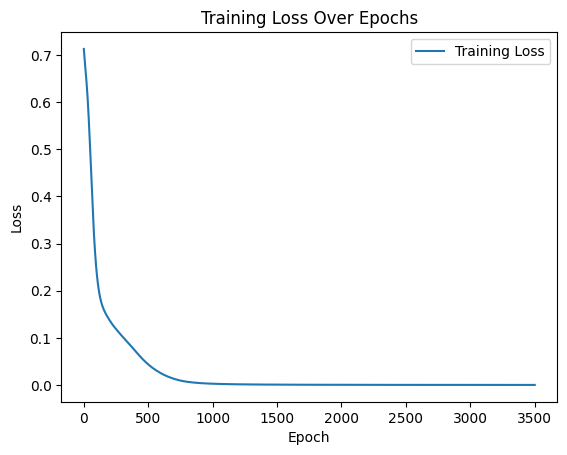

Comparision of Metrics without Cross Validation:
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| Metric          | Logistic Regression  | SVM          | Random Forest | Neural Network
------------------------------------------------------------------------------------------
| Accuracy        | 0.9364               | 0.9191       | 0.9480       | 0.9191       |
------------------------------------------------------------------------------------------
| Precision       | 0.9630               | 0.9390       | 0.9753       | 0.9091       |
------------------------------------------------------------------------------------------
| Recall          | 0.9070               | 0.8953       | 0.9186       | 0.9302       |
------------------------------------------------------------------------------------------
| F1-score        | 0.9341               | 0.9167   

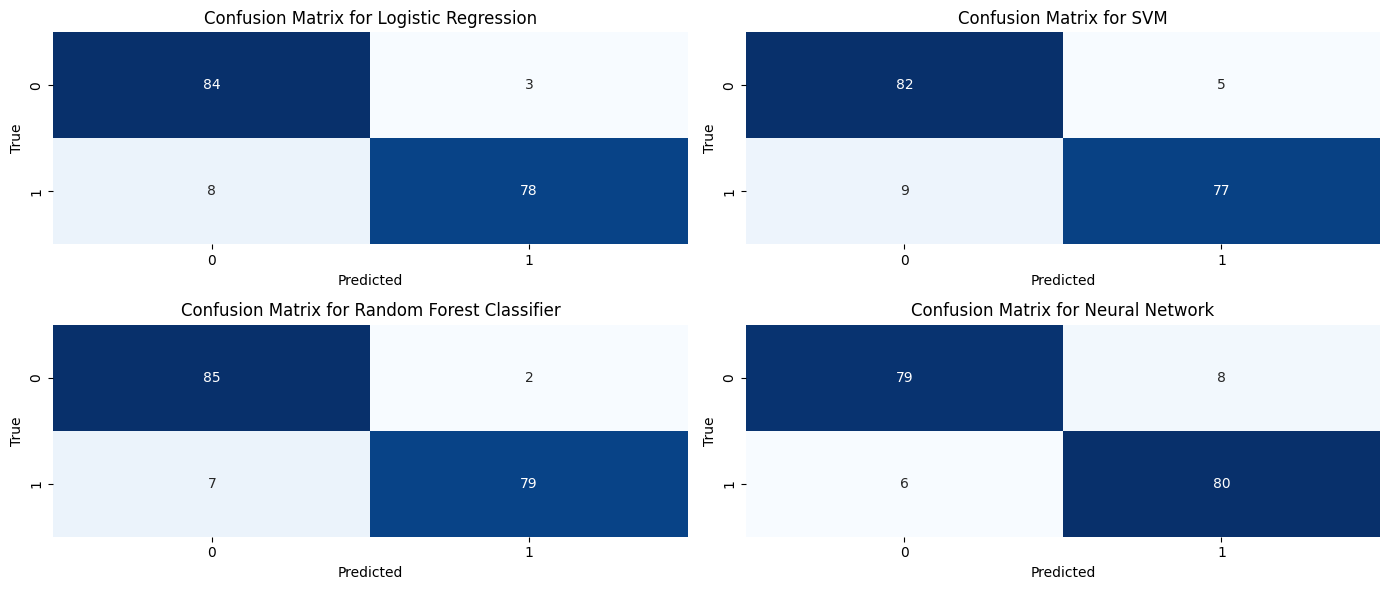

Printing the classification reports
For Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        87
           1       0.96      0.91      0.93        86

    accuracy                           0.94       173
   macro avg       0.94      0.94      0.94       173
weighted avg       0.94      0.94      0.94       173

For Support Vector Machine:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        87
           1       0.94      0.90      0.92        86

    accuracy                           0.92       173
   macro avg       0.92      0.92      0.92       173
weighted avg       0.92      0.92      0.92       173

For Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.98      0.92      0.95        86

    accuracy                           0.95       173
   macro 

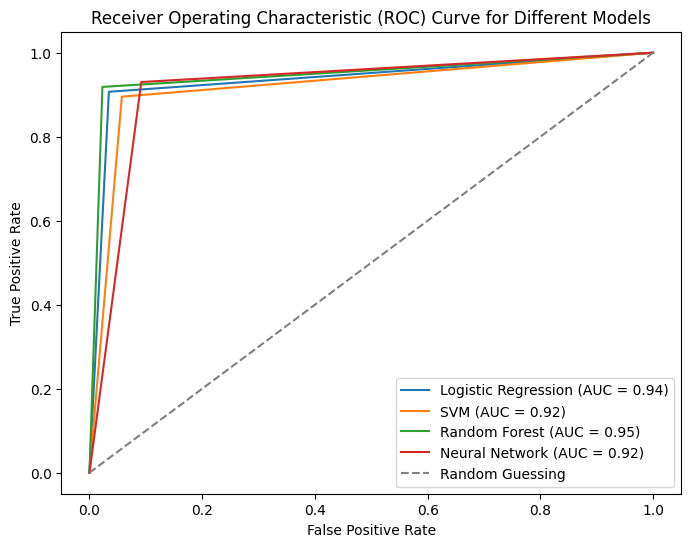

In [ ]:
print("Training and Evaluating the models for data without outliers:")
model_without_outliers = training(X_no_outliers_train_scaled,X_no_outliers_test_scaled,Y_no_outliers_train, Y_no_outliers_test)

Training and Evaluating the models for data with outliers:
Models initialized
__________________________________________________________________________________________
Hyperparameter tuning for SVM started........
Tuning done......
Hyperparameters for SVM after tuning are:
{'C': 1, 'kernel': 'linear', 'gamma': 'scale'}
__________________________________________________________________________________________
Hyperparameter tuning for Random Forest Classifier started........
Tuning done......
Hyperparameters for Random Forest Classifier after tuning are:
{'max_features': 15, 'n_estimators': 250}
__________________________________________________________________________________________
Neural Network traning Started:
Epoch number: 0 and the loss: 0.7004551887512207
Epoch number: 100 and the loss: 0.2355785071849823
Epoch number: 200 and the loss: 0.13568022847175598
Epoch number: 300 and the loss: 0.09726928919553757
Epoch number: 400 and the loss: 0.0704403668642044
Epoch number: 500 a

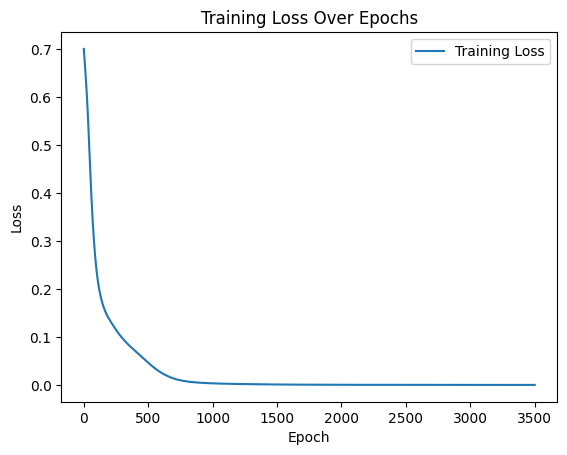

Comparision of Metrics without Cross Validation:
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
| Metric          | Logistic Regression  | SVM          | Random Forest | Neural Network
------------------------------------------------------------------------------------------
| Accuracy        | 0.8947               | 0.9105       | 0.8842       | 0.9000       |
------------------------------------------------------------------------------------------
| Precision       | 0.9213               | 0.9333       | 0.9011       | 0.8800       |
------------------------------------------------------------------------------------------
| Recall          | 0.8632               | 0.8842       | 0.8632       | 0.9263       |
------------------------------------------------------------------------------------------
| F1-score        | 0.8913               | 0.9081   

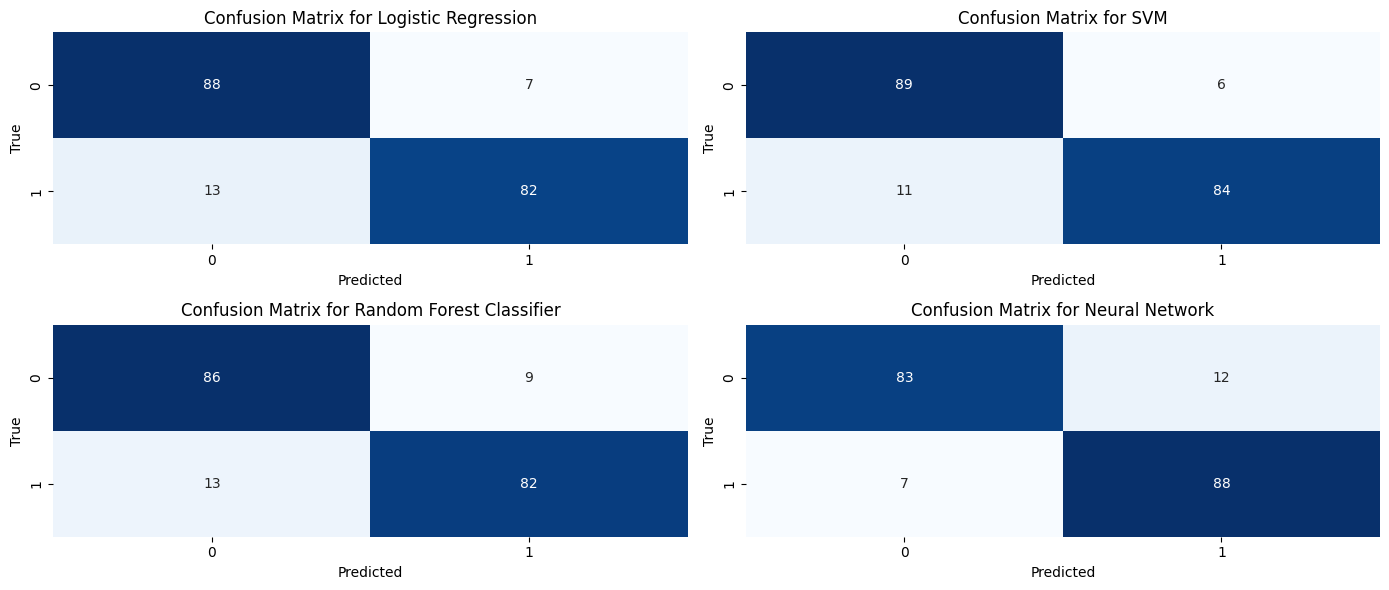

Printing the classification reports
For Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        95
           1       0.92      0.86      0.89        95

    accuracy                           0.89       190
   macro avg       0.90      0.89      0.89       190
weighted avg       0.90      0.89      0.89       190

For Support Vector Machine:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        95
           1       0.93      0.88      0.91        95

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

For Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        95
           1       0.90      0.86      0.88        95

    accuracy                           0.88       190
   macro 

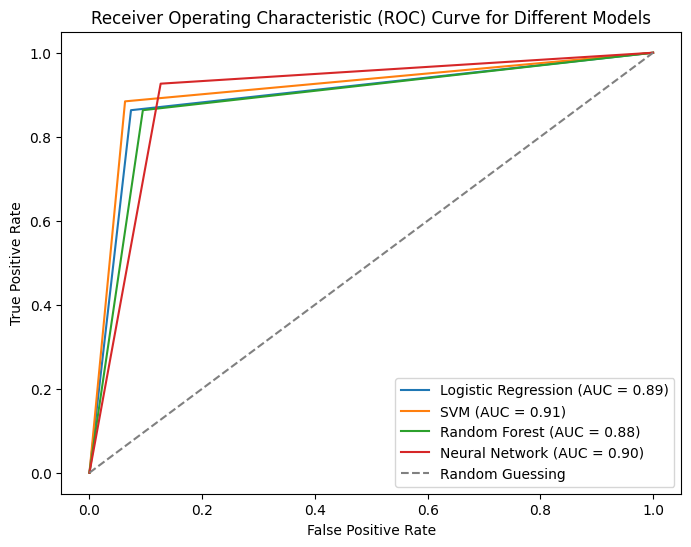

In [ ]:
print("Training and Evaluating the models for data with outliers:")
model_total = training(X_total_train_scaled, X_total_test_scaled, Y_total_train, Y_total_test)

In [ ]:
  # grid_search_svm = GridSearchCV(estimator = sv,
  #                           param_grid = parameters_svm,
  #                           scoring = 'f1',
  #                           cv = 10,
  #                           n_jobs = -1)
  # grid_search_svm = grid_search_svm.fit(x_train, y_train)



    # grid_search_random = GridSearchCV(estimator = rf,
  #                           param_grid = parameters_random,
  #                           scoring = 'f1',
  #                           cv = 10,
  #                           n_jobs = -1)
  # grid_search_random = grid_search_random.fit(x_train, y_train)